### 5章 係り受け解析

In [37]:
import CaboCha
import re
with open("ai.ja.txt", "r", encoding="utf-8_sig") as f1, open("ai.ja.txt.parsed", "w", encoding="utf-8_sig") as f2:
    for line in f1.readlines():
        line = re.sub(r"（.*?）|\(.*?\)", "", line)
        line = re.findall(r"[^。]+(?:[。]|$)", line)
        for sent in line:
            result = CaboCha.Parser("-f1").parseToString(sent)
            f2.write(result)
        

**40. 係り受け解析結果の読み込み（形態素）**

In [38]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

with open("ai.ja.txt.parsed", "r", encoding="utf-8_sig") as f:
    morphs = []
    sent = []
    for line in f:
        if line == "EOS\n":
            morphs.append(sent)
            sent = []
        elif line[0] == "*":
            continue
        else:
            line = line.split("\t")
            surface = line[0]
            line = line[1].split(",")
            base = line[6]
            pos = line[0]
            pos1 = line[1]
            sent.append(Morph(surface, base, pos, pos1))

for morph in morphs[2]:
    print(vars(morph))

{'surface': '人工知能', 'base': '人工知能', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{'surface': '『', 'base': '『', 'pos': '記号', 'pos1': '括弧開'}
{'surface': '計算', 'base': '計算', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '』', 'base': '』', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'という', 'base': 'という', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '概念', 'base': '概念', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '並立助詞'}
{'surface': '『', 'base': '『', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'コンピュータ', 'base': 'コンピュータ', 'pos': '名詞', 'pos1': '一般'}
{'surface': '』', 'base': '』', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'という', 'base': 'という', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '道具', 'base': '道具', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'を', 'base': 'を', 'pos': '助詞', 

**41. 係り受け解析結果の読み込み（文節・係り受け）**

In [39]:
class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []

with open("ai.ja.txt.parsed", "r", encoding="utf-8_sig") as f:
    chunks = []
    sent = []
    for line in f:
        if line == "EOS\n":
            for i, morph in enumerate(sent):
                if morph.dst != -1:
                    sent[morph.dst].srcs.append(i)
            chunks.append(sent)
            sent = []
        elif line[0] == "*":
            dst = int(line.split(" ")[2][:-1])
            sent.append(Chunk([], dst))
        else:
            line = line.split("\t")
            surface = line[0]
            line = line[1].split(",")
            base = line[6]
            pos = line[0]
            pos1 = line[1]
            sent[-1].morphs.append(Morph(surface, base, pos, pos1))

for chunk in chunks[2]:
    print([morph.surface for morph in chunk.morphs], chunk.dst)

['人工知能', 'と', 'は', '、'] 11
['「', '『', '計算', '』', 'という'] 3
['概念', 'と'] 3
['『', 'コンピュータ', '』', 'という'] 4
['道具', 'を'] 5
['用い', 'て'] 7
['『', '知能', '』', 'を'] 7
['研究', 'する'] 8
['計算機科学', 'の'] 9
['一', '分野', '」', 'を'] 10
['指す'] 11
['語', '。'] -1


**42. 係り元と係り先の文節の表示**

In [40]:
deps = []
for sent in chunks:
    for chunk in sent:
        if chunk.dst != -1:
            src_chunk = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
            dst_chunk = "".join([morph.surface for morph in sent[chunk.dst].morphs if morph.pos != "記号"])
            deps.append(src_chunk+"\t"+dst_chunk)
display(deps)
        

['人工知能とは\t語',
 '計算という\tコンピュータという',
 '概念と\tコンピュータという',
 'コンピュータという\t道具を',
 '道具を\t用いて',
 '用いて\t研究する',
 '知能を\t研究する',
 '研究する\t計算機科学の',
 '計算機科学の\t一分野を',
 '一分野を\t指す',
 '指す\t語',
 '言語の\t推論',
 '理解や\t推論',
 '推論\t知的行動を',
 '問題解決などの\t知的行動を',
 '知的行動を\t代わって',
 '人間に\t代わって',
 '代わって\t行わせる',
 'コンピューターに\t行わせる',
 '行わせる\t技術または',
 '技術または\t研究分野とも',
 '計算機による\t情報処理システムの',
 '知的な\t情報処理システムの',
 '情報処理システムの\t実現に関する',
 '設計や\t実現に関する',
 '実現に関する\t研究分野とも',
 '研究分野とも\tされる',
 '日本大百科全書の\t解説で',
 '解説で\t述べている',
 '情報工学者通信工学者の\t佐藤理史は',
 '佐藤理史は\t述べている',
 '次のように\t述べている',
 '人間の\t知的能力を',
 '知的能力を\t実現する',
 'コンピュータ上で\t実現する',
 '実現する\t技術ソフトウェアコンピュータシステム',
 '様々な\t技術ソフトウェアコンピュータシステム',
 '応用例は\tある',
 '自然言語処理\t専門家の',
 '専門家の\t推論判断を',
 '推論判断を\t模倣する',
 '模倣する\tエキスパートシステム',
 'エキスパートシステム\t画像データを',
 '画像データを\t解析して',
 '解析して\t検出抽出したりする',
 '特定の\tパターンを',
 'パターンを\t検出抽出したりする',
 '検出抽出したりする\t画像認識等が',
 '画像認識等が\tある',
 '1956年に\t命名された',
 'ダートマス会議で\t命名された',
 'ジョン・マッカーシーにより\t命名された',
 '現在では\t使われている',
 '記号処理を\t用いた',
 '用いた\t知能の',
 '知能の\t記述を',
 '記述を\tする',
 '主体と\tする',
 '

**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**

In [41]:
deps_noun_verb = []
for sent in chunks:
    for chunk in sent:
        if (chunk.dst != -1 
            and "名詞" in [morph.pos for morph in chunk.morphs] 
            and "動詞" in [morph.pos for morph in sent[chunk.dst].morphs]):
            src_chunk = "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])
            dst_chunk = "".join([morph.surface for morph in sent[chunk.dst].morphs if morph.pos != "記号"])
            deps_noun_verb.append(src_chunk+"\t"+dst_chunk)
display(deps_noun_verb)

['道具を\t用いて',
 '知能を\t研究する',
 '一分野を\t指す',
 '知的行動を\t代わって',
 '人間に\t代わって',
 'コンピューターに\t行わせる',
 '研究分野とも\tされる',
 '解説で\t述べている',
 '佐藤理史は\t述べている',
 '次のように\t述べている',
 '知的能力を\t実現する',
 'コンピュータ上で\t実現する',
 '応用例は\tある',
 '推論判断を\t模倣する',
 '画像データを\t解析して',
 '解析して\t検出抽出したりする',
 'パターンを\t検出抽出したりする',
 '画像認識等が\tある',
 '1956年に\t命名された',
 'ダートマス会議で\t命名された',
 'ジョン・マッカーシーにより\t命名された',
 '現在では\t使われている',
 '記号処理を\t用いた',
 '記述を\tする',
 '主体と\tする',
 '意味あいでも\t使われている',
 '思考ルーチンも\t呼ばれる',
 'ことも\tある',
 'カウンセラーを\t模倣した',
 'プログラムが\t出されるが',
 '引き合いに\t出されるが',
 '計算機に\tさせようという',
 '役割を\tさせようという',
 'エキスパートシステムと\t呼ばれる',
 '実現は\t困難視されている',
 '人間が\t持つ',
 '暗黙に\t持つ',
 '記述が\tなり',
 '問題と\tなり',
 '利用が\t困難視されている',
 'アプローチとしては\t知られているが',
 'アプローチも\t知られているが',
 '差は\tある',
 '記号的明示性に\tある',
 'その後\t集めた',
 'サポートベクターマシンが\t集めた',
 '注目を\t集めた',
 '経験を\t行う',
 '元に\t行う',
 '学習を\t行う',
 '手法も\tある',
 '知性を\t表現し',
 '機械的に\t表現し',
 '表現し\t実装するという',
 '登場により\t行った',
 '流行を\t超えて',
 '社会に\t浸透して',
 '浸透して\t行った',
 '2017年にかけて\t導入した',
 'ディープラーニングを\t導入した',
 'AIが\t破り',
 'プレイヤーも\t破り',
 '麻雀では\t到達するなど

**44. 係り受け木の可視化**

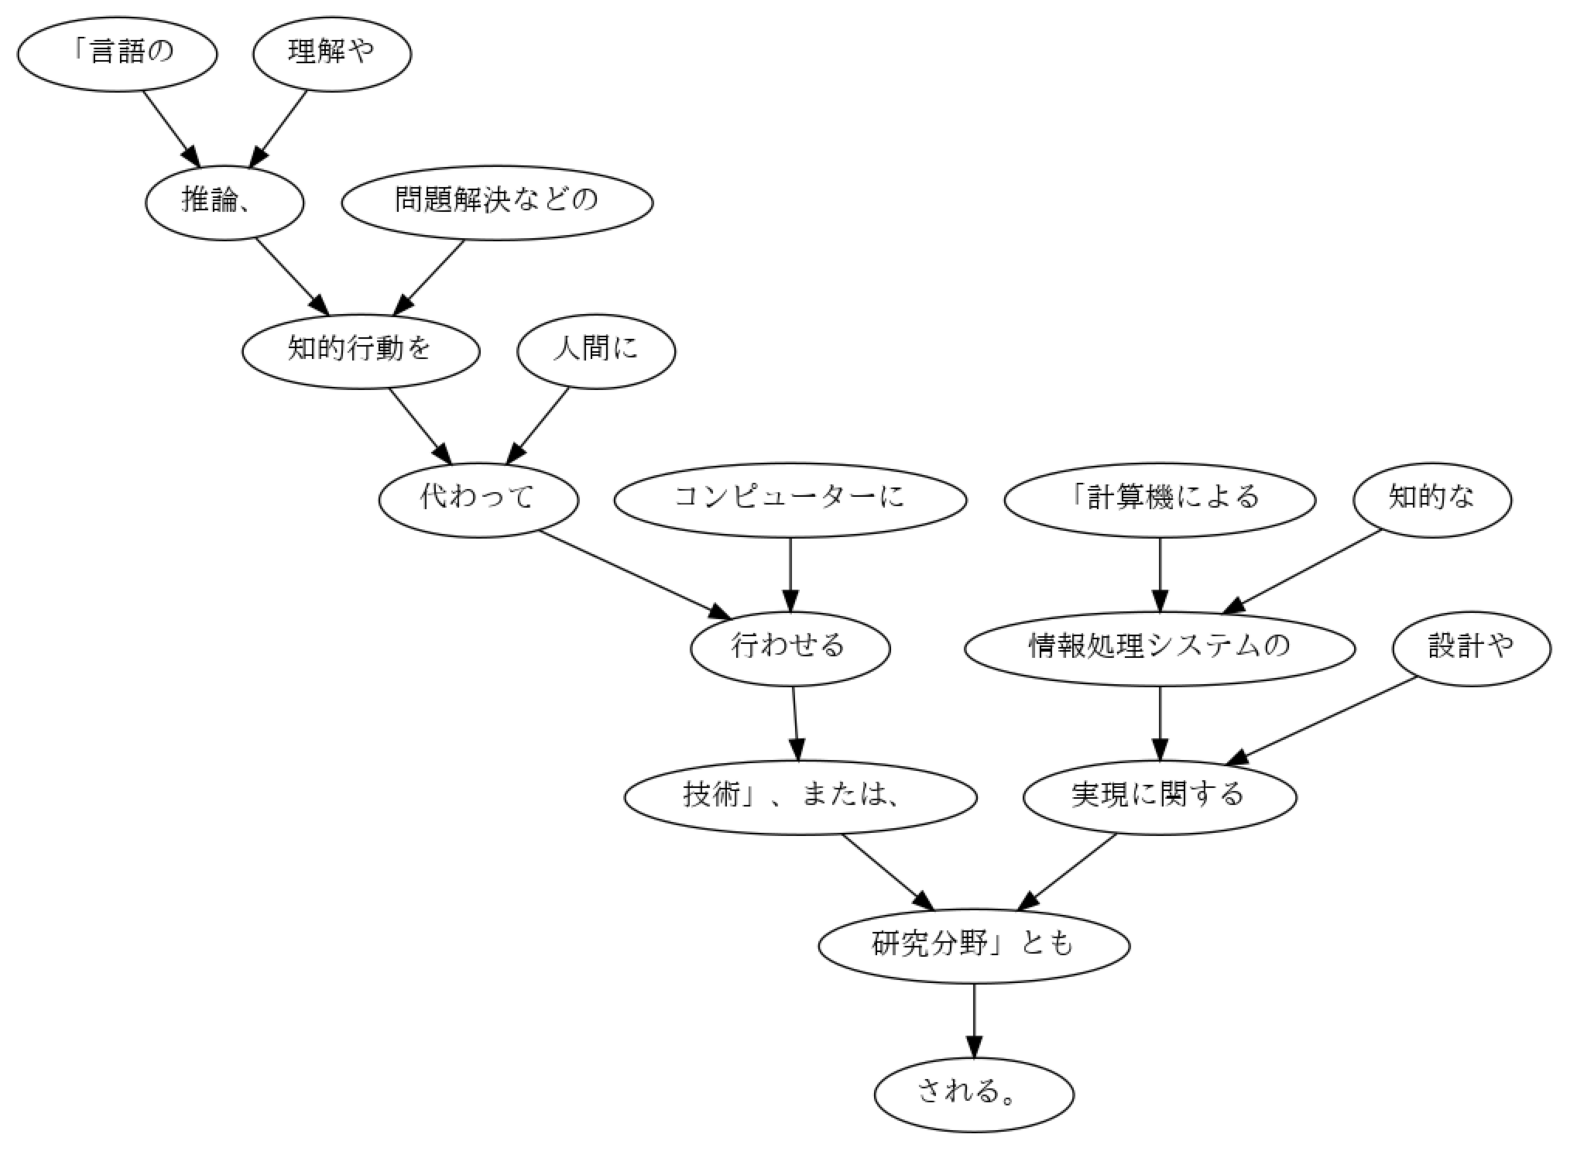

In [48]:
import graphviz
import matplotlib.pyplot as plt
from PIL import Image
import io

def visualize_tree(sent):
    dot = graphviz.Digraph()
    for i, chunk in enumerate(sent):
        dot.node(str(i), "".join([morph.surface for morph in chunk.morphs]))
        if chunk.dst != -1:
            dot.edge(str(i), str(chunk.dst))
    dot.attr("edge", fontname="IPAexGothic")
    dot.attr("node", fontname="IPAexGothic")
    img = dot.pipe(format="png")
    img = Image.open(io.BytesIO(img))
    plt.figure(figsize=(20, 20))
    plt.axis("off")
    plt.imshow(img)
    plt.show()

visualize_tree(chunks[3])

**45. 動詞の格パターンの抽出**

In [75]:
with open("case.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" in [morph.pos for morph in chunk.morphs]:
                verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
                cases = []
                for src in chunk.srcs:
                    case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
                    if len(case) > 0:
                        cases.append(case[-1])
                if len(cases) > 0:
                    cases = sorted(cases)
                    f.write(verb + "\t" + " ".join(cases) + "\n")

with open("case.txt", "r", encoding="utf-8_sig") as f:
    for line in f.readlines()[:20]:
        print(line, end="")

用いる	を
する	て を
指す	を
代わる	に を
行う	て に
する	も
述べる	で に は
する	で を
する	を
する	を
する	て を
ある	が は
する	で に により
用いる	を
する	と を
使う	でも は
呼ぶ	も
ある	も
する	を
出す	が に


**46. 動詞の格フレーム情報の抽出**

In [76]:
with open("case2.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" in [morph.pos for morph in chunk.morphs]:
                verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
                cases = []
                morphs_case = []
                for src in chunk.srcs:
                    case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
                    if len(case) > 0:
                        cases.append(case[-1])
                        morphs_case.append("".join([m.surface for m in sent[src].morphs]))
                if len(cases) > 0:
                    sorted_idx = sorted(range(len(cases)), key=lambda x: cases[x])
                    cases = [cases[i] for i in sorted_idx]
                    morphs_case = [morphs_case[i] for i in sorted_idx]
                    cases += morphs_case
                    f.write(verb + "\t" + " ".join(cases) + "\n")

with open("case2.txt", "r", encoding="utf-8_sig") as f:
    for line in f.readlines()[:20]:
        print(line, end="")

用いる	を 道具を
する	て を 用いて 『知能』を
指す	を 一分野」を
代わる	に を 人間に 知的行動を
行う	て に 代わって コンピューターに
する	も 研究分野」とも
述べる	で に は 解説で、 次のように 佐藤理史は
する	で を コンピュータ上で 知的能力を
する	を 推論・判断を
する	を 画像データを
する	て を 解析して パターンを
ある	が は 画像認識等が 応用例は
する	で に により ダートマス会議で 1956年に ジョン・マッカーシーにより
用いる	を 記号処理を
する	と を 主体と 記述を
使う	でも は 意味あいでも 現在では、
呼ぶ	も 思考ルーチンも
ある	も ことも
する	を カウンセラーを
出す	が に プログラムが 引き合いに


**47. 機能動詞構文のマイニング**

In [77]:
with open("case3.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "動詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            
            verb = [morph.base for morph in chunk.morphs if morph.pos == "動詞"][0]
            pverb = ""
            cases = []
            morphs_case = []
            for src in chunk.srcs:
                case = [morph.base for morph in sent[src].morphs if morph.pos == "助詞"]
            
                if not case:
                    continue

                for m in sent[src].morphs:
                    if case[-1] != "を" or m.pos1 != "サ変接続":
                        continue
                    pverb = m.base + "を" + verb
                    break
                else:
                    cases.append(case[-1])
                    morphs_case.append("".join([m.surface for m in sent[src].morphs]))
            
            if not cases or not pverb:
                continue

            sorted_idx = sorted(range(len(cases)), key=lambda x: cases[x])
            cases = [cases[i] for i in sorted_idx]
            morphs_case = [morphs_case[i] for i in sorted_idx]
            cases += morphs_case
            f.write(pverb + "\t" + " ".join(cases) + "\n")

with open("case3.txt", "r", encoding="utf-8_sig") as f:
    for line in f.readlines()[:20]:
        print(line, end="")

行動を代わる	に 人間に
記述をする	と 主体と
注目を集める	が 「サポートベクターマシン」が
学習を行う	に 元に
学習をする	に は を通して 元に ACT-Rでは、 生成規則を通して
進化を見せる	て において は 加えて、 生成技術において GANは、
開発を行う	は エイダ・ラブレスは
専用をする	に は 1992年に IBMは
投資を上回る	が コストが
意味をする	から に対して ここから 非構造化データに対して、
処理を行う	に Webに
意味をする	に データに
処理を行う	て に 付加して、 コンピュータに
研究を進める	て 費やして
命令をする	で 機構で
運転をする	に 元に
特許をする	が に 日本が 2018年までに
運転をする	て に 基づいて、 柔軟に
注目を集める	から は ことから、 ファジィは
制御を用いる	て も 受けて、 他社も


**48. 名詞から根へのパスの抽出**

In [78]:
with open("case4.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        for chunk in sent:
            if "名詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            
            path = []
            while chunk.dst != -1:
                path.append("".join([m.surface for m in chunk.morphs if m.pos != "記号"]))
                chunk = sent[chunk.dst]
            path.append("".join([m.surface for m in chunk.morphs if m.pos != "記号"]))

            if len(path) > 1:
                f.write(" -> ".join(path) + "\n")

with open("case4.txt", "r", encoding="utf-8_sig") as f:
    for line in f.readlines()[:20]:
        print(line, end="")

人工知能とは -> 語
計算という -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
知能を -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
研究する -> 計算機科学の -> 一分野を -> 指す -> 語
計算機科学の -> 一分野を -> 指す -> 語
一分野を -> 指す -> 語
言語の -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
コンピューターに -> 行わせる -> 技術または -> 研究分野とも -> される
技術または -> 研究分野とも -> される
計算機による -> 情報処理システムの -> 実現に関する -> 研究分野とも -> される
知的な -> 情報処理システムの -> 実現に関する -> 研究分野とも -> される
情報処理システムの -> 実現に関する -> 研究分野とも -> される


**49. 名詞間の係り受けパスの抽出**

In [79]:
from itertools import combinations

def getSurface(chunks : list[Chunk]):
    tmp = ["".join([m.surface for m in chunk.morphs if m.pos != "記号"]) for chunk in chunks]
    tmp = " -> ".join(tmp)
    return tmp

def replaceNouns(chunk : Chunk, s : str):
    isNoun = False
    nouns = []
    replaced_chunk = Chunk([], -1)
    for i, morph in enumerate(chunk.morphs):
        if morph.pos == "名詞":
            nouns.append(i)
            isNoun = True
        elif isNoun:
            break
    if not nouns:
        return chunk
    replaced_morph = Morph(s, "", "", "")
    replaced_chunk.morphs = [chunk.morphs[i] for i in range(len(chunk.morphs)) if i not in nouns]
    replaced_chunk.morphs.insert(nouns[0], replaced_morph)
    return replaced_chunk

with open("case5.txt", "w", encoding="utf-8_sig") as f:
    for sent in chunks:
        chunks_noun = []
        for chunk in sent:
            if "名詞" not in [morph.pos for morph in chunk.morphs]:
                continue
            chunks_noun.append(chunk)

        for chunk_i, chunk_j in combinations(chunks_noun, 2):
            path_i = []
            i_dst = sent.index(chunk_i)
            # 文節i～根の中に分節jが存在する場合
            while sent[i_dst].dst != -1:
                path_i.append(sent[i_dst])
                i_dst = sent[i_dst].dst
                if sent[i_dst] == chunk_j:
                    path_i.append(chunk_j)
                    if len(path_i) > 1:
                        path_i[0] = replaceNouns(path_i[0], "X")
                        path_i[-1] = replaceNouns(path_i[-1], "Y")
                        f.write(getSurface(path_i) + "\n")
                    break
            # 文節i～根の中に分節jが存在しない場合
            else:
                path_j = []
                j_dst = sent.index(chunk_j)
                while sent[j_dst].dst != -1:
                    path_j.append(sent[j_dst])
                    j_dst = sent[j_dst].dst
                    if sent[j_dst] in path_i:
                        paths = [] 
                        chunk_k = sent[j_dst]
                        path_i[0] = replaceNouns(path_i[0], "X")
                        path_j[0] = replaceNouns(path_j[0], "Y")
                        paths.append(getSurface(path_i[:path_i.index(chunk_k)]))
                        paths.append(getSurface(path_j))
                        paths.append(getSurface([chunk_k]))
                        f.write(" | ".join(paths) + "\n")
                        break

with open("case5.txt", "r", encoding="utf-8_sig") as f:
    for line in f.readlines()[:20]:
        print(line, end="")

Xとは -> Y
Xという | Yと | コンピュータという
Xという -> Yという
Xという -> コンピュータという -> Yを
Xという -> コンピュータという -> 道具を -> 用いて | Yを | 研究する
Xという -> コンピュータという -> 道具を -> 用いて -> Yする
Xという -> コンピュータという -> 道具を -> 用いて -> 研究する -> Yの
Xという -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> Yを
Xという -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> Y
Xと -> Yという
Xと -> コンピュータという -> Yを
Xと -> コンピュータという -> 道具を -> 用いて | Yを | 研究する
Xと -> コンピュータという -> 道具を -> 用いて -> Yする
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> Yの
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> Yを
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> Y
Xという -> Yを
Xという -> 道具を -> 用いて | Yを | 研究する
Xという -> 道具を -> 用いて -> Yする
Xという -> 道具を -> 用いて -> 研究する -> Yの
